Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
airl=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airl

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans

In [6]:
mms=MinMaxScaler()
data=pd.DataFrame(mms.fit_transform(airl.iloc[:,1:]))
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [7]:
ss=StandardScaler()
data_norm=pd.DataFrame(ss.fit_transform(airl.iloc[:,1:]))
data_norm

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [8]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)  

In [9]:
df_norm = norm_func(airl.iloc[:,1:])  

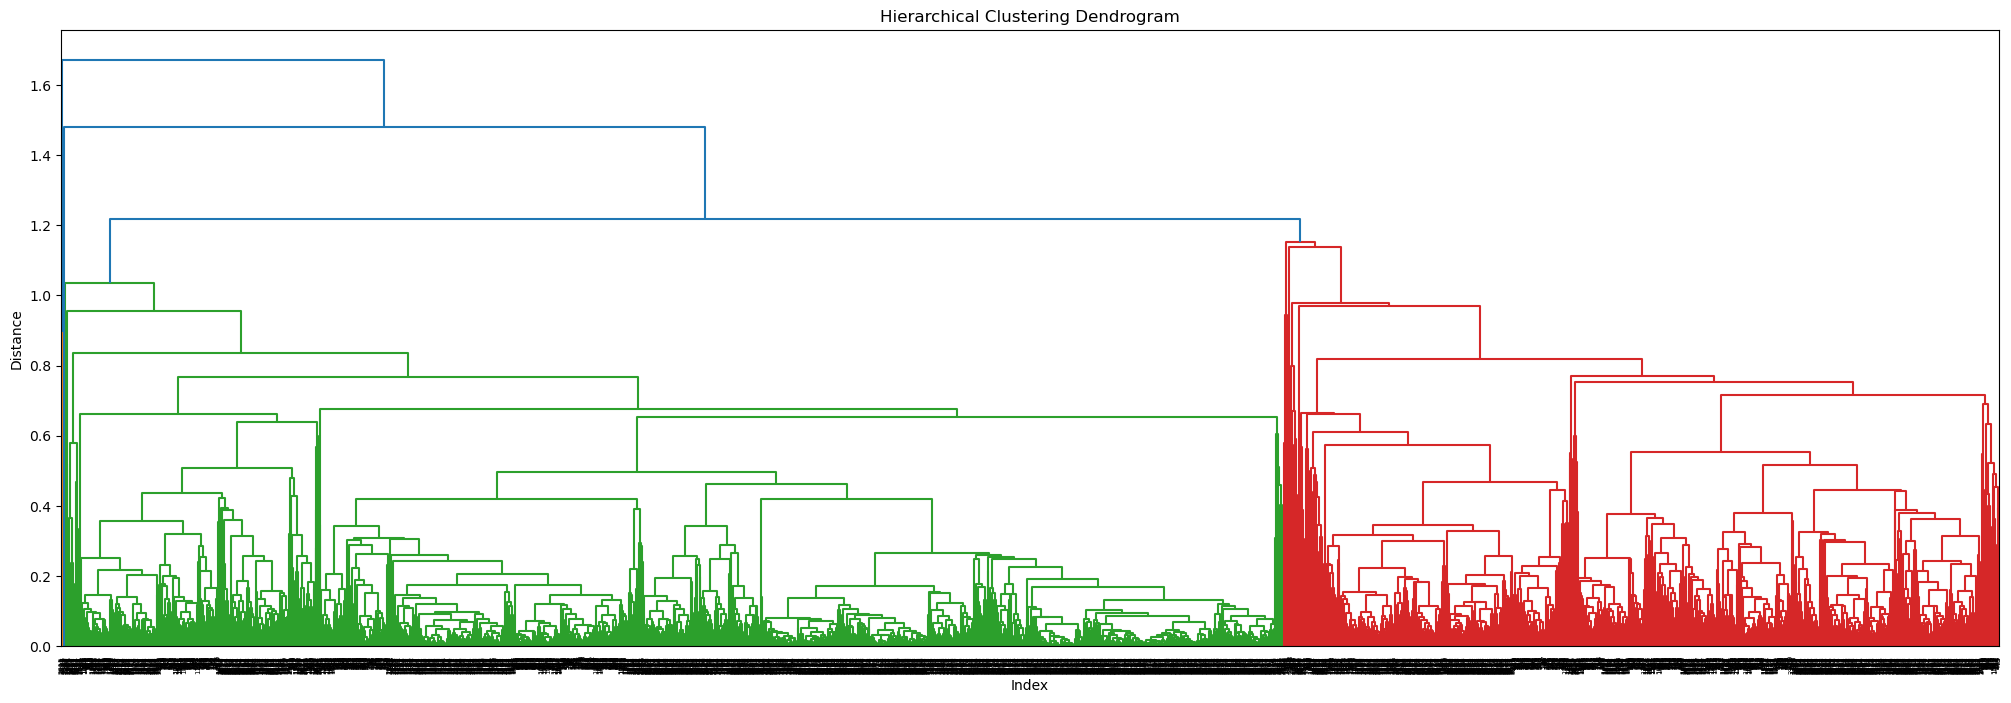

In [10]:
z=linkage(data, method='average', metric='euclidean')
plt.figure(figsize=(25,8))
plt.xlabel("Index")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
sch.dendrogram(z,)
plt.show()

In [11]:
import warnings
warnings.filterwarnings('ignore')
h_complete=AgglomerativeClustering(n_clusters=10,linkage='average',affinity='euclidean').fit(df_norm)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airl['Cluster']=cluster_labels
airl

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


In [12]:
airl.iloc[:,1:].groupby(airl.Cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
Cluster,,,,,,,,,,,,
0,7.656512e+04,147.750000,3.875000,1.000000,4.250000,115273.250000,30.250000,600.000000,2.000000,5127.875000,1.0,0.0
1,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0,1.0
2,2.083429e+05,0.000000,3.000000,1.000000,3.857143,69533.142857,25.571429,400.000000,1.142857,4026.428571,0.0,2.0
3,5.896919e+04,87.881673,1.701195,1.013944,1.000797,10057.188446,9.095219,225.898008,0.651394,3818.370518,0.0,3.0
4,9.462619e+04,243.878809,2.665512,1.000000,1.000693,27554.179363,15.409972,792.367036,2.419668,4621.225762,1.0,4.0
5,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.0,5.0
6,4.044688e+05,0.000000,5.000000,1.000000,1.000000,221842.500000,28.500000,2398.833333,6.166667,6331.833333,1.0,6.0
7,1.067429e+05,58.823529,1.176471,2.352941,1.000000,16892.705882,23.235294,1253.117647,4.705882,4683.176471,1.0,7.0
8,8.557000e+03,0.000000,1.000000,1.000000,1.000000,200622.000000,5.000000,622.000000,3.000000,1955.000000,1.0,8.0


In [13]:
airl.Cluster.mean()

3.3760940235058765

In [14]:
Cluster1=airl[airl.Cluster==1]
Cluster1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,1
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,1
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,1
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,1


In [15]:
Cluster1=airl[airl.Cluster==3]
Cluster1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
5,6,16420,0,1,1,1,0,0,0,0,6942,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,3
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,3
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


In [30]:
array= airl.values
array

array([[    1, 28143,     0, ...,  7000,     0,     3],
       [    2, 19244,     0, ...,  6968,     0,     3],
       [    3, 41354,     0, ...,  7034,     0,     3],
       ...,
       [ 4019, 73597,     0, ...,  1402,     1,     4],
       [ 4020, 54899,     0, ...,  1401,     0,     3],
       [ 4021,  3016,     0, ...,  1398,     0,     3]], dtype=int64)

In [31]:
print(airl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  Cluster            3999 non-null   int64
dtypes: int64(13)
memory usage: 406.3 KB
None


In [32]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X  

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01, -6.43885294e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01, -6.43885294e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01, -6.43885294e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  1.06814748e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -6.43885294e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -6.43885294e-01]])

In [33]:
dbscan = DBSCAN(eps=0.98, min_samples=13).fit(X) 

In [34]:
dbscan.labels_ 

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [35]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 
pd.set_option("display.max_rows", None) 
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
5,0
6,0
7,1
8,-1
9,-1


In [42]:
df = pd.concat([airl,cl],axis=1)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4,-1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,3,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,3,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,4,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,7,-1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,4,-1


In [43]:
dl = dbscan.labels_    

In [44]:
import sklearn
sklearn.metrics.silhouette_score(X, dl)   

0.22642530073448155

In [45]:
from sklearn.neighbors import NearestNeighbors 
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

### QUESTION 2

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [48]:
cd = pd.read_csv('crime_data.csv')
cd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [49]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [50]:
cd[cd.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [51]:
cd1 = cd.drop(['Unnamed: 0'],axis = 1)
cd1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [52]:
cd1_norm = pd.DataFrame(normalize(cd1), columns= cd1.columns)
cd1_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


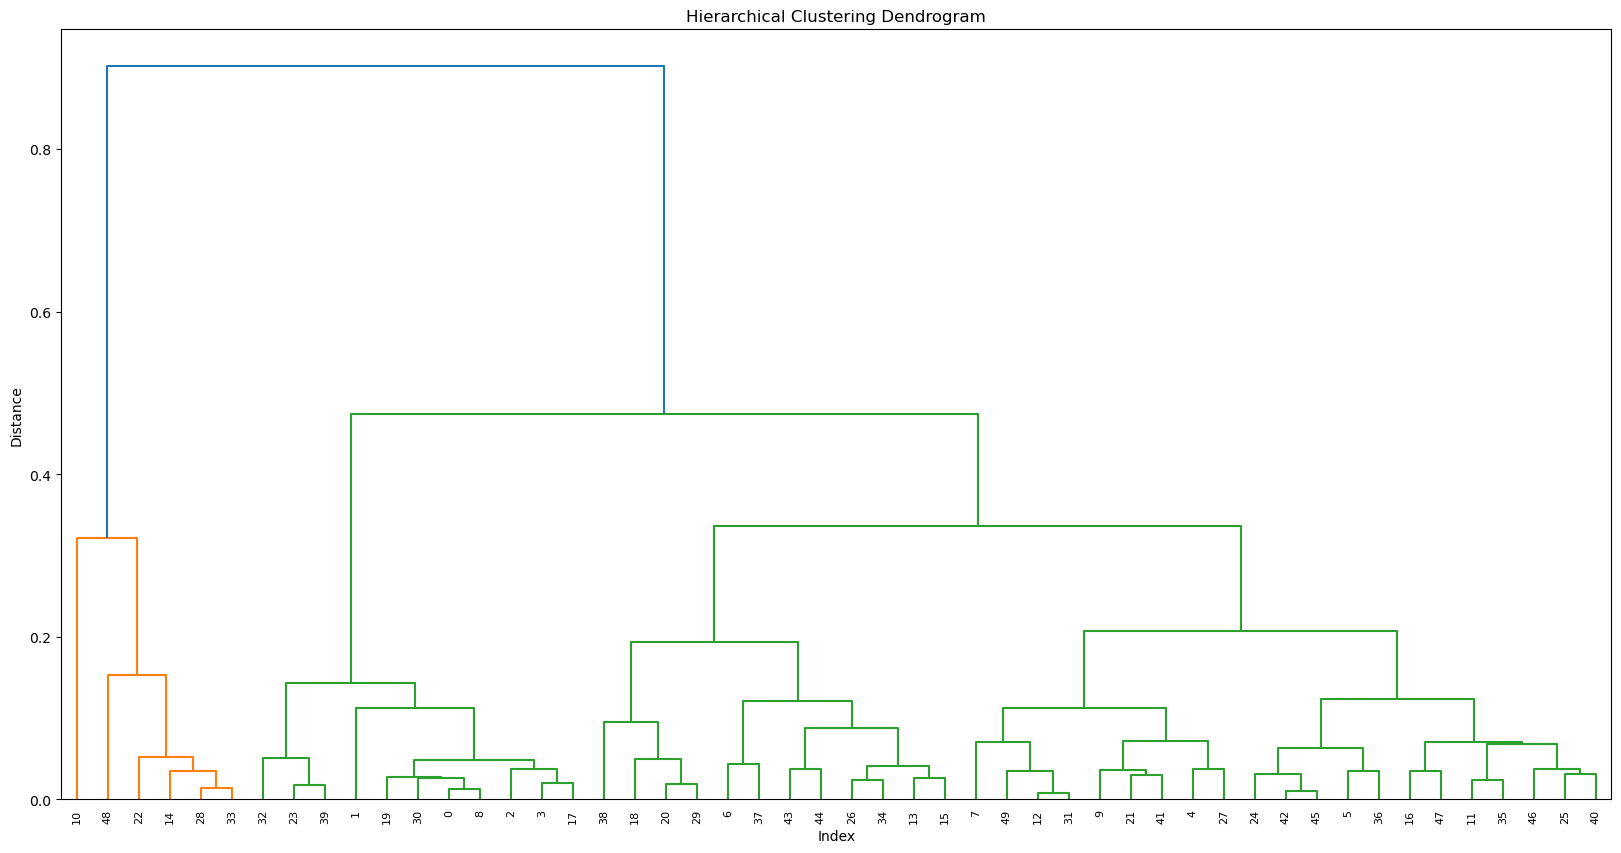

In [53]:
z = linkage(cd1_norm, method="complete",metric="euclidean")
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [54]:
h_complete = AgglomerativeClustering(n_clusters=5 , linkage='complete',affinity = "euclidean").fit(cd1_norm)


In [55]:
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0     2
1     2
2     2
3     2
4     0
5     0
6     1
7     0
8     2
9     0
10    4
11    0
12    0
13    1
14    3
15    1
16    0
17    2
18    1
19    2
20    1
21    0
22    3
23    2
24    0
25    0
26    1
27    0
28    3
29    1
30    2
31    0
32    2
33    3
34    1
35    0
36    0
37    1
38    1
39    2
40    0
41    0
42    0
43    1
44    1
45    0
46    0
47    0
48    3
49    0
dtype: int64

In [57]:
cd1['clust']=cluster_labels
cd1

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


In [58]:
data= cd1[(cd1.clust==1)]
data

,Murder,Assault,UrbanPop,Rape,clust
6,3.3,110,77,11.1,1
13,7.2,113,65,21.0,1
15,6.0,115,66,18.0,1
18,2.1,83,51,7.8,1
20,4.4,149,85,16.3,1
26,4.3,102,62,16.5,1
29,7.4,159,89,18.8,1
34,7.3,120,75,21.4,1
37,6.3,106,72,14.9,1
38,3.4,174,87,8.3,1


In [59]:
data= cd1[(cd1.clust==3)]
data

,Murder,Assault,UrbanPop,Rape,clust
14,2.2,56,57,11.3,3
22,2.7,72,66,14.9,3
28,2.1,57,56,9.5,3
33,0.8,45,44,7.3,3
48,2.6,53,66,10.8,3


In [60]:
data= cd1[(cd1.clust==4)]
data

,Murder,Assault,UrbanPop,Rape,clust
10,5.3,46,83,20.2,4


### DBSCAN

In [62]:
cd1 = cd.drop(['Unnamed: 0'],axis = 1)
cd1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [63]:
array = cd1.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [64]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X 

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [65]:
dbscan = DBSCAN(eps=0.92, min_samples=2).fit(X) 

In [67]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  4,  3,  1,  5, -1,  1,  1, -1,  1,  4,  3,  2, -1,  1,
        1,  1,  4,  1, -1,  5,  1,  0,  2,  4, -1,  1,  4,  1,  1,  1],
      dtype=int64)

In [68]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 
pd.set_option("display.max_rows", None) 
cl

,cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,0


In [70]:
dl = dbscan.labels_   

In [71]:
import sklearn
sklearn.metrics.silhouette_score(X, dl)  

0.10614313313825663

In [73]:
from sklearn.neighbors import NearestNeighbors 
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

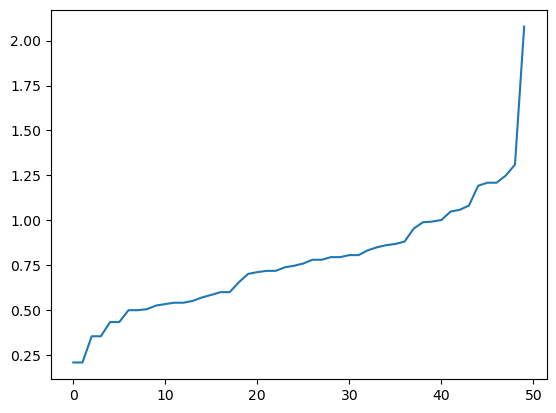

In [74]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)  